In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [3]:
from google.colab import files
data=files.upload()

Saving diabetes.csv to diabetes.csv


In [4]:
data=pd.read_csv('diabetes.csv')

X = data.drop('Outcome', axis=1)
y = data['Outcome']

label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])


imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_imputed['Outcome'] = y

X_train, X_test, y_train, y_test = train_test_split(X_imputed.drop('Outcome', axis=1), X_imputed['Outcome'], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

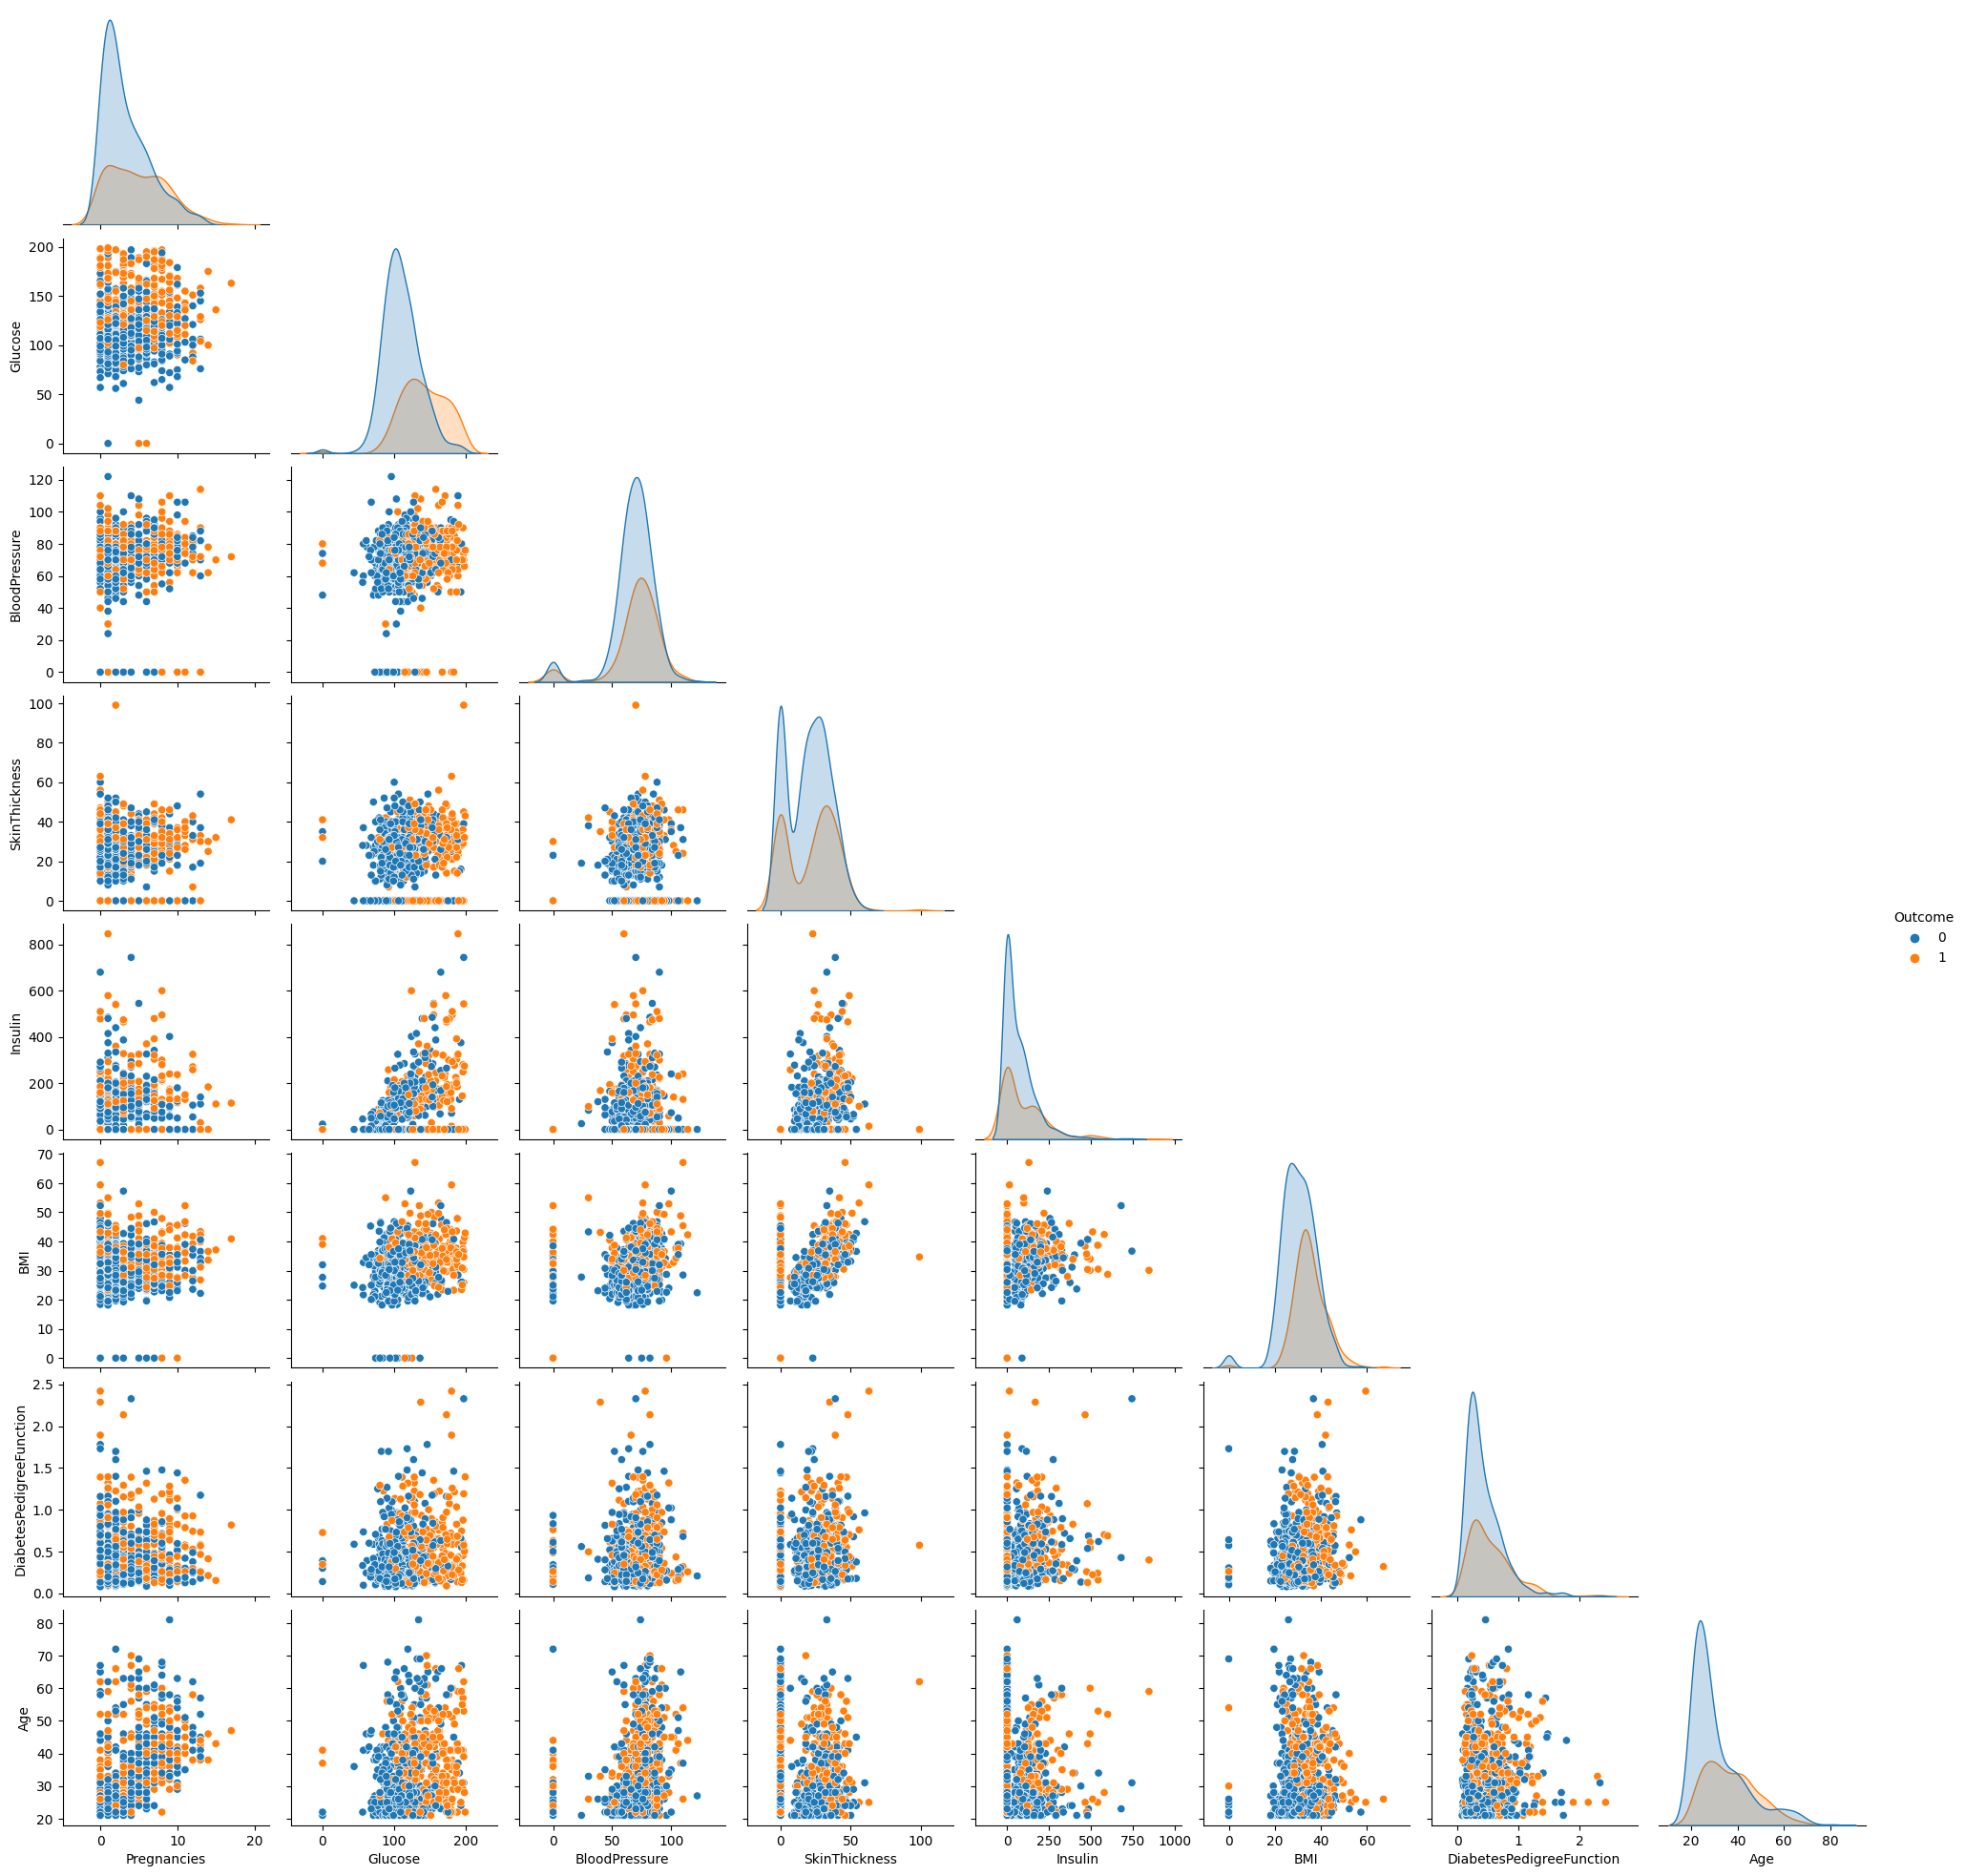

In [5]:
import matplotlib.pyplot as plt
sns.pairplot(data,hue='Outcome',corner=True)



<Axes: >

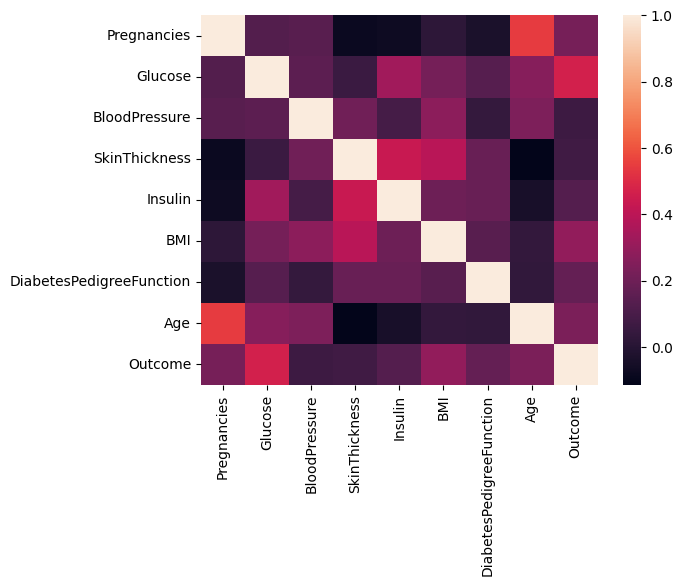

In [6]:
sns.heatmap(data.corr())

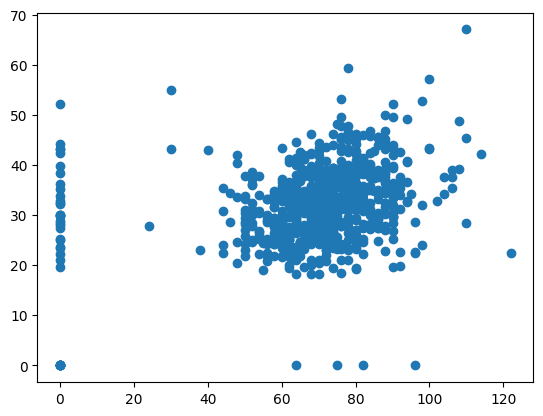

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [7]:

a=data['Pregnancies']
b=data['Glucose']
c=data['BloodPressure']
d=data['SkinThickness']
e=data['Insulin']
f=data['BMI']
g=data['DiabetesPedigreeFunction']
h=data['Age']
i=data['Outcome']

plt.scatter(c,f)
plt.show()
from sklearn.cluster import KMeans

data = list(zip(c,f))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


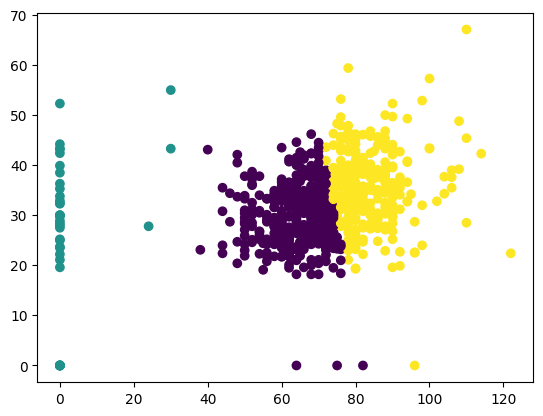

In [8]:

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(c,f, c=kmeans.labels_)
plt.show()

In [9]:
from sklearn.cluster import KMeans

inertia = kmeans.inertia_
print("Inertia:", inertia)


Inertia: 86035.99831996509


In [10]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: -0.048663635245935664


In [11]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(X, kmeans.labels_)
print("Davies-Bouldin Index:", db_index)


Davies-Bouldin Index: 5.670222190977795


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

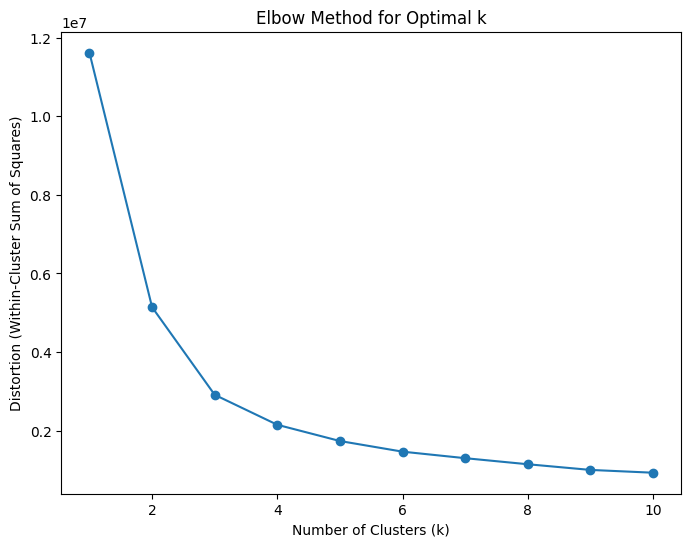

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

distortions = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Within-Cluster Sum of Squares)')
plt.show()


Optimal K value: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


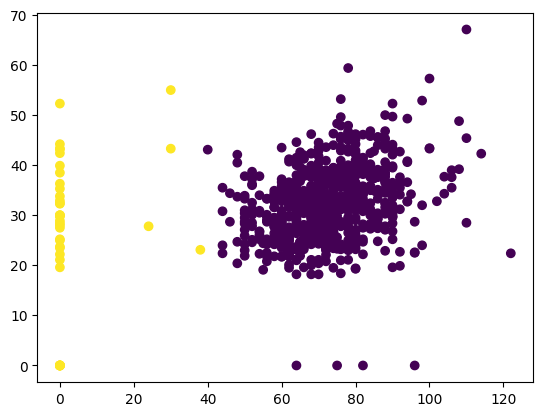

In [13]:
print("Optimal K value: 2")
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(c,f, c=kmeans.labels_)
plt.show()

In [14]:
pip install hmmlearn


In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
url = "diabetes.csv"
names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
dataset = pd.read_csv(url, names=names)

# Check for missing values
if dataset.isnull().values.any():
    print("Dataset contains missing values. Please handle them before proceeding.")
    # You can handle missing values by imputing or dropping them

# Convert non-numeric columns to numeric or drop them
X = dataset.drop("Outcome", axis=1)
X_numeric = X.apply(pd.to_numeric, errors="coerce").dropna()

# Check for non-numeric values in the target variable (y)
y = dataset["Outcome"]
y_numeric = pd.to_numeric(y, errors="coerce").dropna()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y_numeric, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize HMM model
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)

# Fit the model to the data
model.fit(X_train_scaled)

# Predict hidden states
hidden_states_train = model.predict(X_train_scaled)
hidden_states_test = model.predict(X_test_scaled)

# Convert the hidden states to binary predictions
predictions_train = (hidden_states_train == 1).astype(int)
predictions_test = (hidden_states_test == 1).astype(int)

# Evaluate the model
accuracy_train = accuracy_score(y_train, predictions_train)
accuracy_test = accuracy_score(y_test, predictions_test)
conf_matrix_test = confusion_matrix(y_test, predictions_test)
classification_rep_test = classification_report(y_test, predictions_test)

print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)
print("\nConfusion Matrix (Testing):\n", conf_matrix_test)
print("\nClassification Report (Testing):\n", classification_rep_test)


Training Accuracy: 0.6514657980456026
Testing Accuracy: 0.6428571428571429

Confusion Matrix (Testing):
 [[99  0]
 [55  0]]

Classification Report (Testing):
               precision    recall  f1-score   support

         0.0       0.64      1.00      0.78        99
         1.0       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


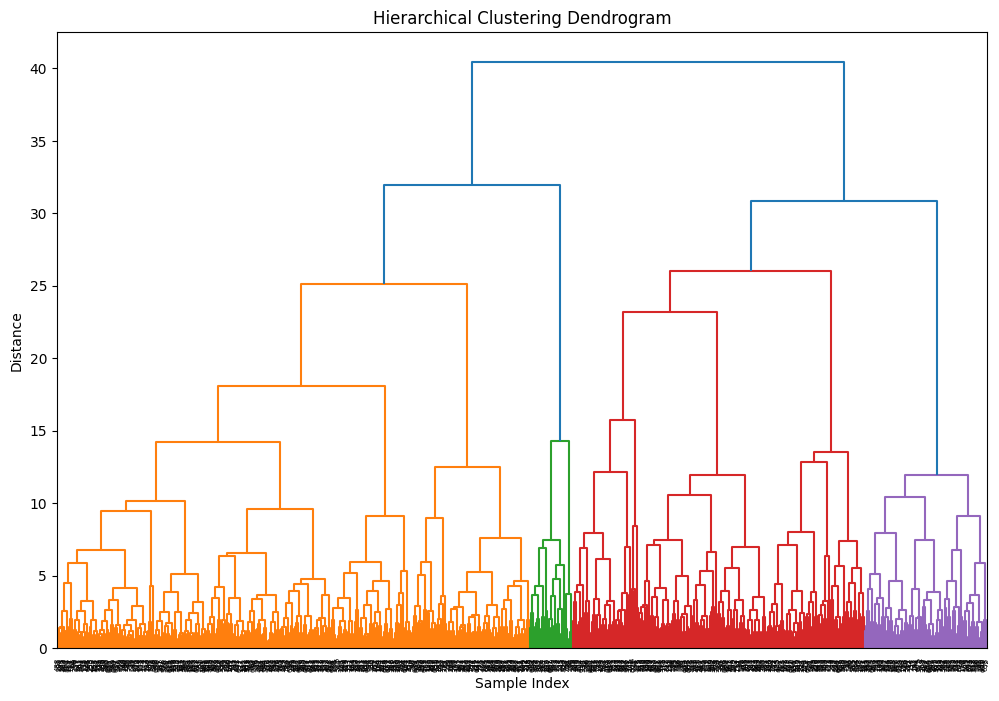

In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the dataset
url = "diabetes.csv"
names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
dataset = pd.read_csv(url, names=names)

# Separate features (X) and target variable (y)
X = dataset.drop("Outcome", axis=1)

# Convert non-numeric columns to numeric or drop them
X_numeric = X.apply(pd.to_numeric, errors="coerce").dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Apply hierarchical clustering using Ward's method
linked = linkage(X_scaled, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


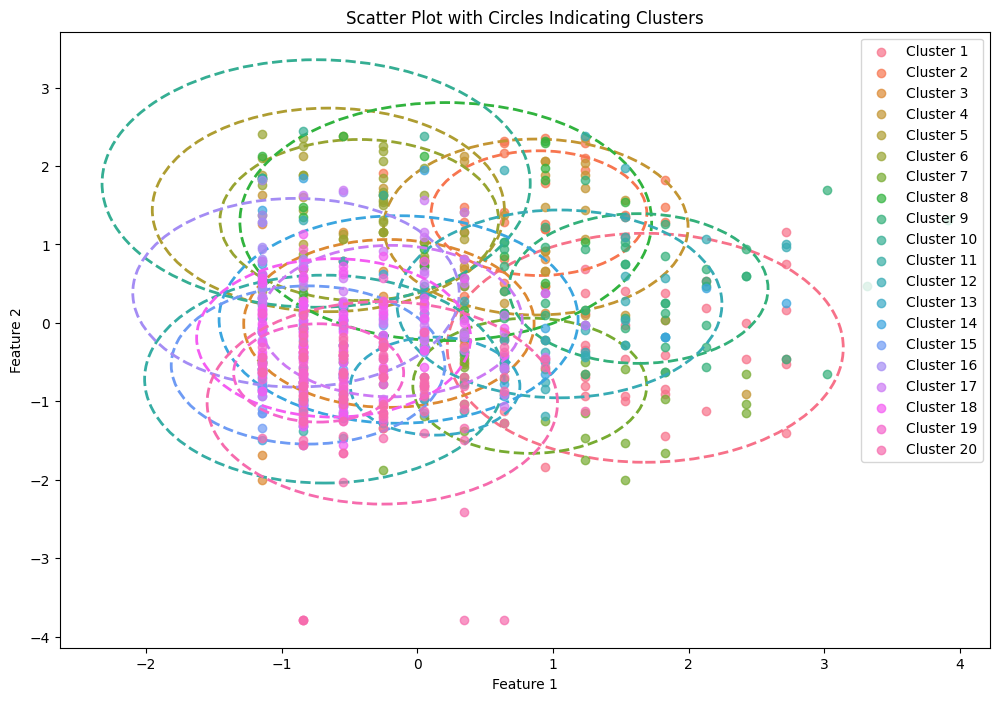

In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "diabetes.csv"
names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
dataset = pd.read_csv(url, names=names)

# Separate features (X) and target variable (y)
X = dataset.drop("Outcome", axis=1)

# Convert non-numeric columns to numeric or drop them
X_numeric = X.apply(pd.to_numeric, errors="coerce").dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Apply hierarchical clustering using Ward's method
linked = linkage(X_scaled, 'ward')

# Determine the optimal number of clusters (you can adjust this threshold)
max_d = 10
clusters = fcluster(linked, max_d, criterion='distance')

# Create a scatter plot with circles indicating the clustering
plt.figure(figsize=(12, 8))

# Get the number of unique clusters
num_clusters = len(np.unique(clusters))

# Use seaborn to get a color palette with enough colors for clusters
colors = sns.color_palette("husl", n_colors=num_clusters)

# Plot each cluster separately with circles
for cluster_num in np.unique(clusters):
    cluster_indices = np.where(clusters == cluster_num)
    cluster_center = np.mean(X_scaled[cluster_indices], axis=0)
    cluster_radius = np.max(np.linalg.norm(X_scaled[cluster_indices] - cluster_center, axis=1))

    plt.scatter(X_scaled[cluster_indices, 0], X_scaled[cluster_indices, 1], label=f'Cluster {cluster_num}', alpha=0.7, color=colors[cluster_num-1])
    plt.gca().add_patch(plt.Circle(cluster_center, cluster_radius/3, fill=False, color=colors[cluster_num-1], linestyle='dashed', linewidth=2))

plt.title('Scatter Plot with Circles Indicating Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Load the dataset
names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
dataset = pd.read_csv("diabetes.csv", names=names)

# Separate features (X) and target variable (y)
X = dataset.drop("Outcome", axis=1)

# Convert non-numeric columns to numeric or drop them
X_numeric = X.apply(pd.to_numeric, errors="coerce").dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Apply hierarchical clustering using Ward's method
ward_clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred = ward_clusters.fit_predict(X_scaled)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, y_pred)

print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.15675483450688257


In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

# Load the dataset
url = "diabetes.csv"
names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
dataset = pd.read_csv(url, names=names)

# Separate features (X) and target variable (y)
X = dataset.drop("Outcome", axis=1)

# Convert non-numeric columns to numeric or drop them
X_numeric = X.apply(pd.to_numeric, errors="coerce").dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Apply hierarchical clustering using Ward's method
ward_clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred = ward_clusters.fit_predict(X_scaled)

# Calculate Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(X_scaled, y_pred)

print("Davies-Bouldin Index:", davies_bouldin_index)


Davies-Bouldin Index: 2.36392660767599
